In [63]:
import numpy as np # fundamental package for scientific computing in Python.
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # data visualization library

In [64]:
# Read in CSV data to Dataframe
df = pd.read_csv('AAPL.csv')
saved_df = df.copy(deep = True) # create copy of orginal dataframe

# Drop Multiple Columns (not required for this analysis)
df = df.drop(['Open','High','Low','Volume','Adj Close'], axis=1)

# subset of data
df = df.iloc[4000:9000]
df.reset_index(inplace=True) # Reset the index to default integer index

#
df

,index,Date,Close
0,4000,1996-10-09,0.821429
1,4001,1996-10-10,0.863839
2,4002,1996-10-11,0.866071
3,4003,1996-10-14,0.901786
4,4004,1996-10-15,0.901786
...,...,...,...
4995,8995,2016-08-15,109.480003
4996,8996,2016-08-16,109.379997
4997,8997,2016-08-17,109.220001
4998,8998,2016-08-18,109.080002


In [65]:
# Price Change + Direction
df['closing_price_change'] = df['Close'].diff() # difference between the values in current row and previous row
df['pct_change'] = df['Close'].pct_change()
vals = [] # empty list
for value in df['closing_price_change']:
    if (value >= 0):
        vals.append(1)
    else:
        vals.append(0)           
df['price_change_direction'] = vals # Postive v Negative (Trend Direction)


# Moving Averages
df['SMA'] = df.Close.rolling(window=10).mean() # SMA -->> simple moving average (SMA)
df['CMA'] = df.iloc[:,2].expanding(min_periods=10).mean() # -->> cumaltive moving average (CMA)
df['50ema'] = df.iloc[:,2].ewm(span=50,adjust=False).mean() # -->> exponential moving average (50 day EMA) (weight on recent prices)
df['200ema'] = df.iloc[:,2].ewm(span=200,adjust=False).mean() # -->> exponential moving average (200 day EMA) (weight on recent prices)


# Moving Average Convergence Divergence (MACD)
df['short_ema'] = df.Close.ewm(span=12,adjust=False).mean() # -->> short EMA
df['long_ema'] = df.Close.ewm(span=26,adjust=False).mean() # -->> short EMA
df['macd'] = df.short_ema - df.long_ema # -->> macd line
df['signal'] = df.macd.ewm(span=9,adjust=False).mean() # -->> signal
df['macd_difference_signal'] = df.macd - df.signal
mds = [] # empty list
for value in df['macd_difference_signal']:
    if (value >= 0):
        mds.append("positive")
    else:
        mds.append("negative")           
df['mds_direction'] = mds # Postive v Negative (Trend Direction)


# Relative Strenght Index (RSI)
delta = df['Close'].diff()
gain = (delta.where(delta>0,0)).rolling(window=14).mean() # average gains (MAs)
loss = (-delta.where(delta<0,0)).rolling(window=14).mean() # average losses (MAs)
rs = gain/loss # RS = avg_gains/avg_losses
rsi = 100 - (100/(1+rs))
df['RSI'] = rsi # rsi value
df['rsi_change'] = df.RSI.diff() # rsi_change()
#
#  RSI direction change
rsi_c = [] # empty list
for val in df['rsi_change']:
    if (val>= 0):
        rsi_c.append(1)
    else:
        rsi_c.append(0)           
df['rsi_change_direction'] = rsi_c # Postive v Negative (Trend Direction)
#
# RSI overbought v oversold flag
indicator = []
for i in range(len(df)):
    if df['RSI'][i] > 70:
        indicator.append("RSI_overbought_indicator")
    elif df['RSI'][i] < 30:
        indicator.append("RSI_oversold_indicator")
    else:
       indicator.append(np.nan)
df['rsi_indicator'] = indicator


# Bollingor Bands (SMA, UpperBand + LowerBand)
df['bollingor_band_sma'] = df['Close'].rolling(window=20).mean() # Calculate the 20-period Simple Moving Average (SMA)
df['bb_sma_std'] = df['Close'].rolling(window=20).std() # Calculate the 20-period Standard Deviation (SD)
df['bb_upper_band'] = df['bollingor_band_sma'] + 2 * df['bb_sma_std'] # Calculate the Upper Bollinger Band (UB) x2 std above
df['bb_lower_band'] = df['bollingor_band_sma'] - 2 * df['bb_sma_std'] # Calculate the Lower Bollinger Band (LB) x2 std below

df

,index,Date,Close,closing_price_change,pct_change,price_change_direction,SMA,CMA,50ema,200ema,...,macd_difference_signal,mds_direction,RSI,rsi_change,rsi_change_direction,rsi_indicator,bollingor_band_sma,bb_sma_std,bb_upper_band,bb_lower_band
0,4000,1996-10-09,0.821429,NaN,NaN,0,NaN,NaN,0.821429,0.821429,...,0.000000,positive,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,4001,1996-10-10,0.863839,0.042411,0.051630,1,NaN,NaN,0.823092,0.821851,...,0.002707,positive,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,4002,1996-10-11,0.866071,0.002232,0.002584,1,NaN,NaN,0.824777,0.822291,...,0.004397,positive,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,4003,1996-10-14,0.901786,0.035714,0.041237,1,NaN,NaN,0.827797,0.823082,...,0.007490,positive,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4,4004,1996-10-15,0.901786,0.000000,0.000000,1,NaN,NaN,0.830699,0.823865,...,0.009002,positive,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8995,2016-08-15,109.480003,1.300003,0.012017,1,107.439001,30.400720,101.606313,103.421936,...,0.318820,positive,85.642765,4.385524,1,RSI_overbought_indicator,104.193501,4.140951,112.475402,95.911599
4996,8996,2016-08-16,109.379997,-0.100006,-0.000913,0,107.929001,30.416525,101.911163,103.481220,...,0.254784,positive,77.268871,-8.373894,0,RSI_overbought_indicator,104.669000,4.164304,112.997608,96.340393
4997,8997,2016-08-17,109.220001,-0.159996,-0.001463,0,108.272001,30.432292,102.197784,103.538322,...,0.167143,positive,73.106089,-4.162782,0,RSI_overbought_indicator,105.132000,4.127804,113.387609,96.876391
4998,8998,2016-08-18,109.080002,-0.139999,-0.001282,0,108.593001,30.448025,102.467675,103.593464,...,0.070197,positive,73.036911,-0.069179,0,RSI_overbought_indicator,105.614500,3.987839,113.590179,97.638822


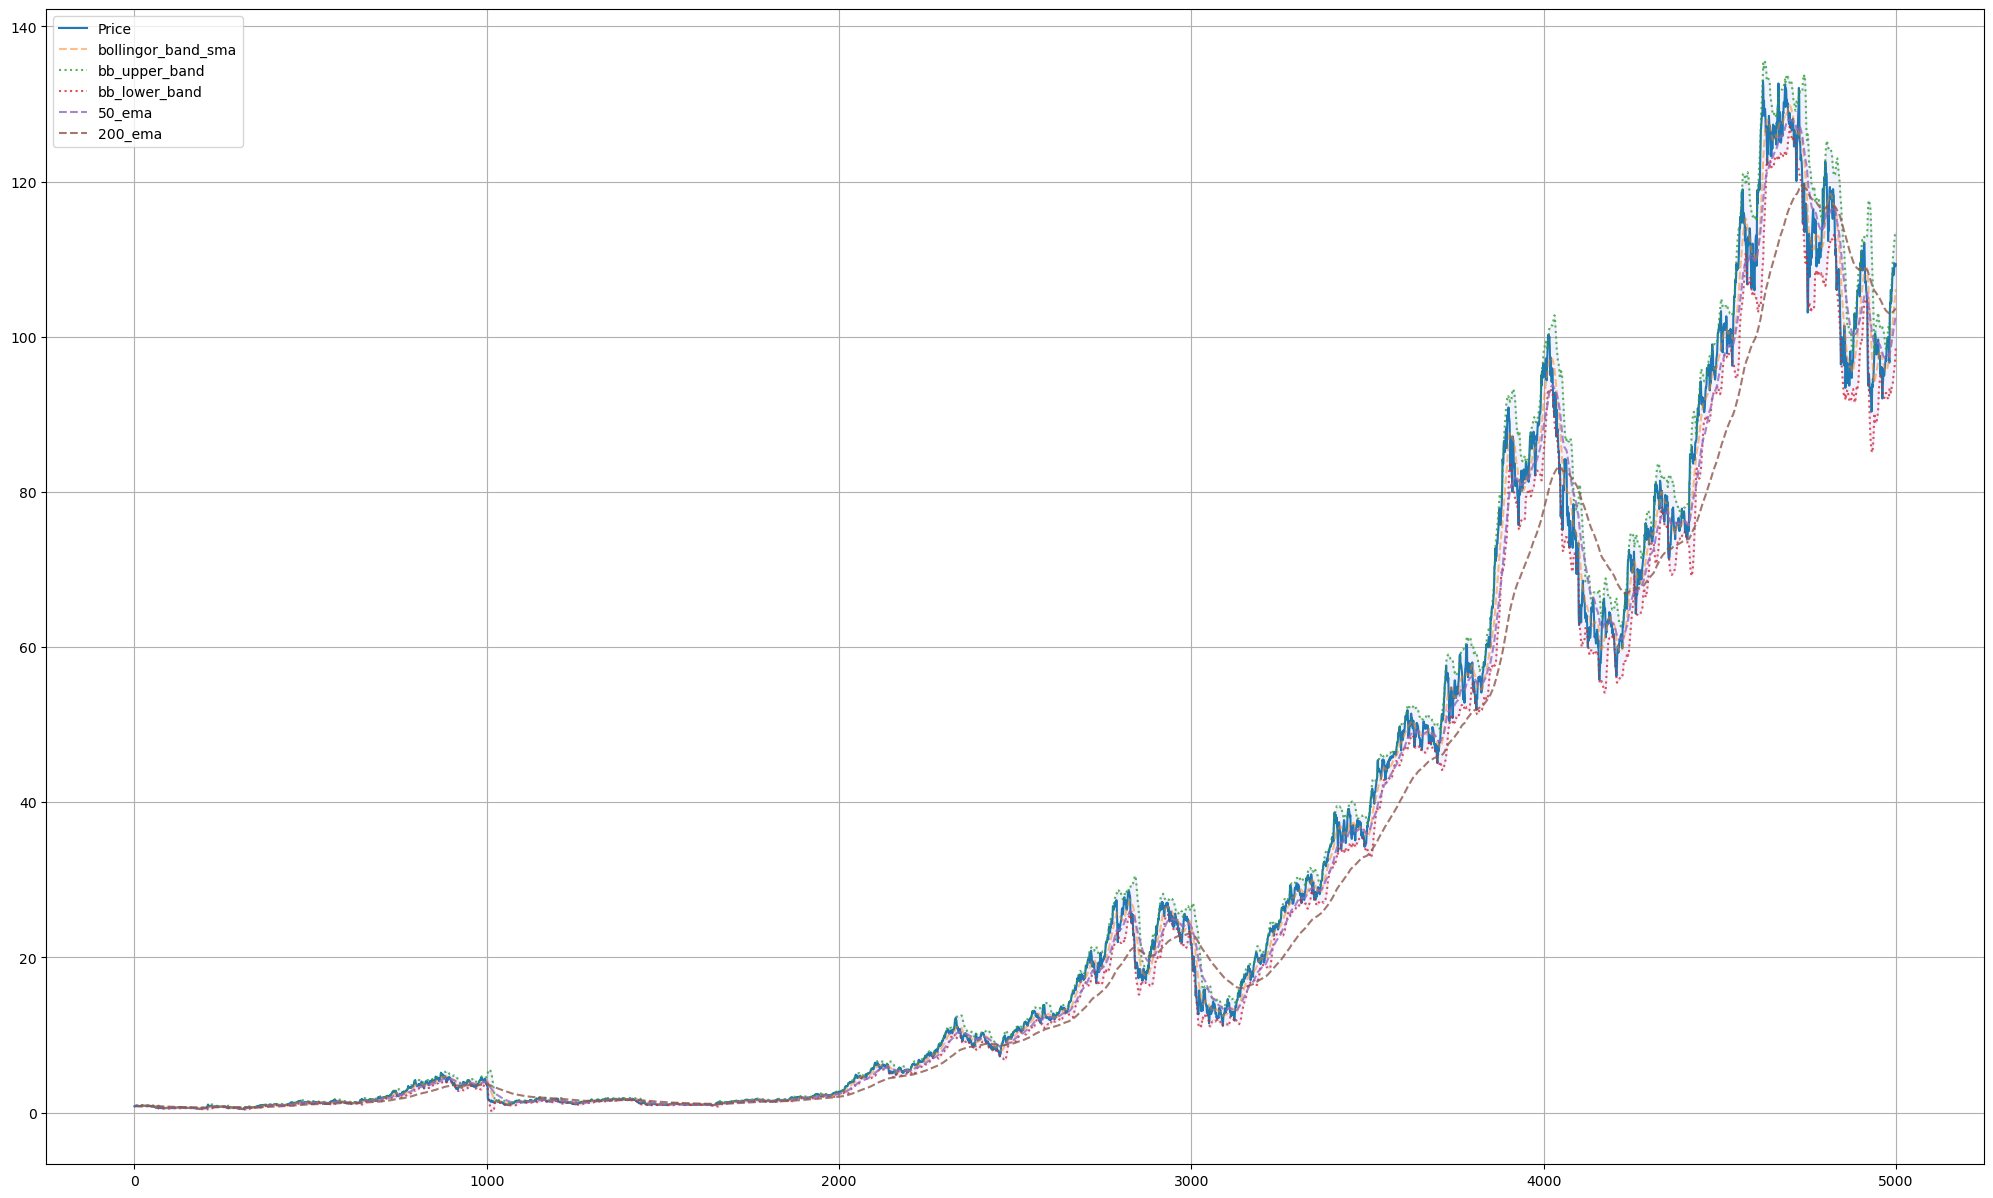

In [66]:
plt.figure(figsize=[25,15])
plt.grid(True)
plt.plot(df['Close'],label='Price')
plt.plot(df['bollingor_band_sma'],label='bollingor_band_sma',alpha=0.5,linestyle='--')
plt.plot(df['bb_upper_band'],label='bb_upper_band',alpha=0.8,linestyle=':')
plt.plot(df['bb_lower_band'],label='bb_lower_band',alpha=0.8,linestyle=':')
plt.fill_between(x=df.index, y1=df['bb_upper_band'], y2=df['bb_lower_band'], color='blue', alpha=0.05)
plt.plot(df['50ema'],label='50_ema',alpha=0.8,linestyle='--')
plt.plot(df['200ema'],label='200_ema',alpha=0.8,linestyle='--')
plt.legend(loc=2)


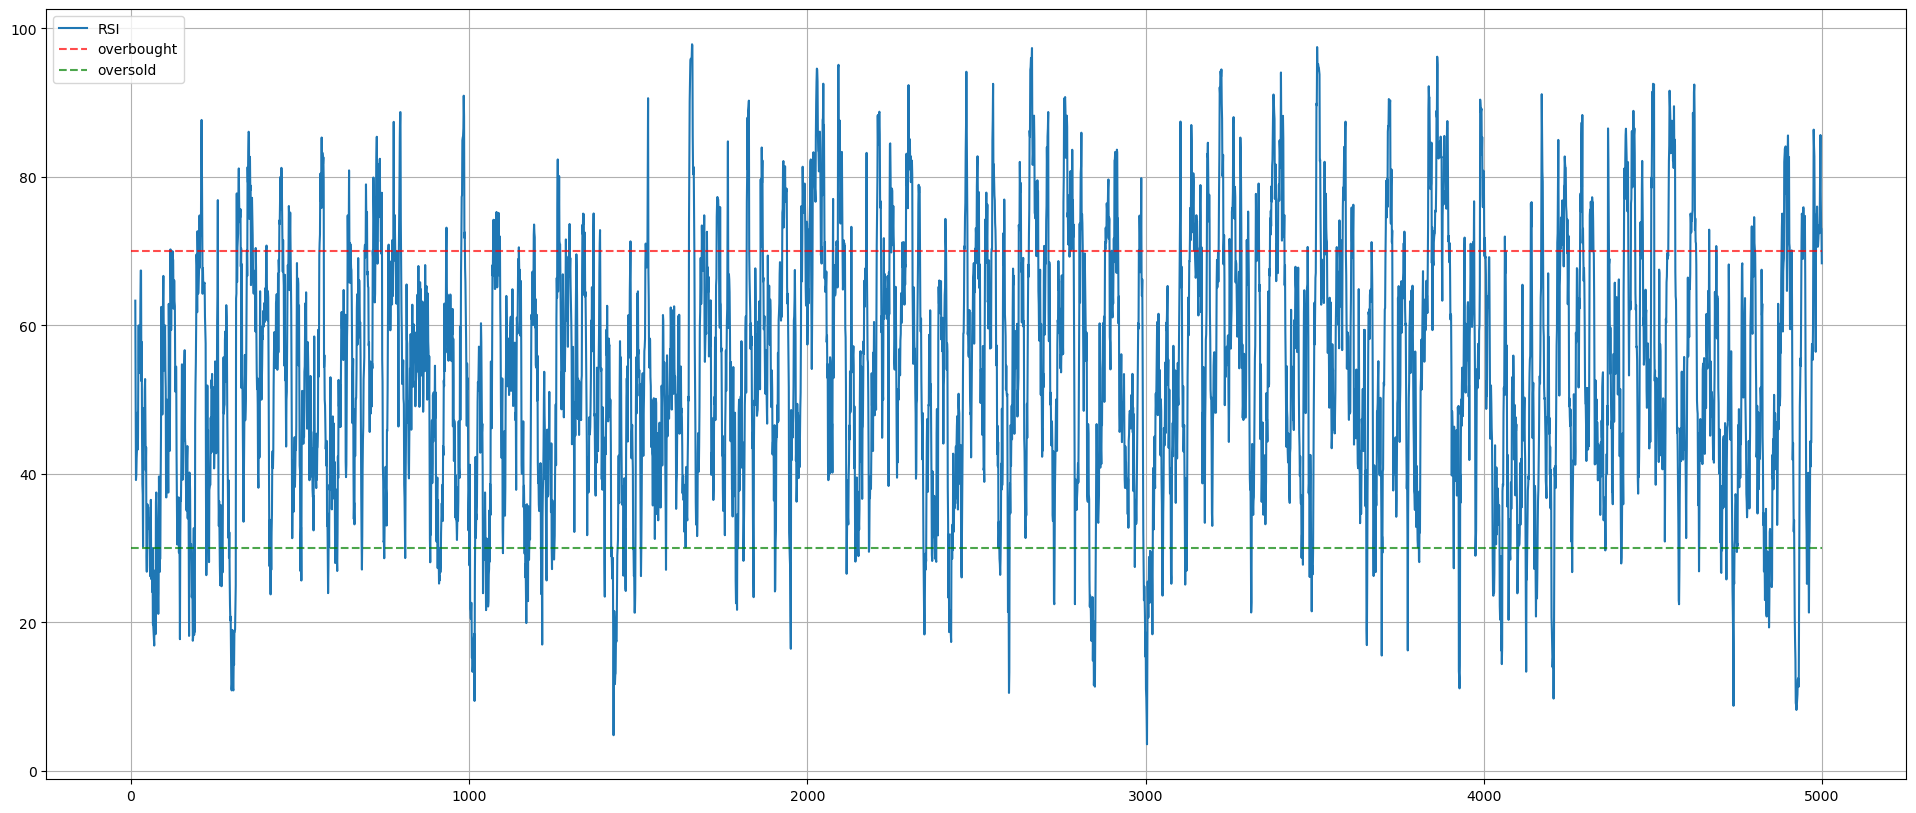

In [67]:
x1,y1 = [0,df.index[-1]],[70,70] # overbought
x2,y2 = [0,df.index[-1]],[30,30] # oversold


plt.figure(figsize=[24,10])
plt.grid(True)
plt.plot(df['RSI'],label='RSI')
plt.plot(x1, y1,label='overbought',color='red',alpha=0.7,linestyle='--')
plt.plot(x2, y2,label='oversold',color='green',alpha=0.7,linestyle='--')

plt.legend(loc=2)

# MACD v SIGNAL

In [68]:
check = []

for i in range(len(df)):
    if df['macd'][i] == df['signal'][i]:
        check.append(df['macd'][i])
    else:
        check.append(np.nan)

#Create DataFrame including all above features and randomly generated data
strategy = pd.DataFrame ({'Date':df.Date,'Price':df.Close,'MACD':df.macd,'SIGNAL':df.signal,
                          'trigger':check,'50_ema':df['50ema'],'200_ema':df['200ema']})
strategy

,Date,Price,MACD,SIGNAL,trigger,50_ema,200_ema
0,1996-10-09,0.821429,0.000000,0.000000,0.0,0.821429,0.821429
1,1996-10-10,0.863839,0.003383,0.000677,NaN,0.823092,0.821851
2,1996-10-11,0.866071,0.006173,0.001776,NaN,0.824777,0.822291
3,1996-10-14,0.901786,0.011138,0.003648,NaN,0.827797,0.823082
4,1996-10-15,0.901786,0.014901,0.005899,NaN,0.830699,0.823865
...,...,...,...,...,...,...,...
4995,2016-08-15,109.480003,2.880802,2.561982,NaN,101.606313,103.421936
4996,2016-08-16,109.379997,2.880462,2.625678,NaN,101.911163,103.481220
4997,2016-08-17,109.220001,2.834607,2.667464,NaN,102.197784,103.538322
4998,2016-08-18,109.080002,2.755209,2.685013,NaN,102.467675,103.593464


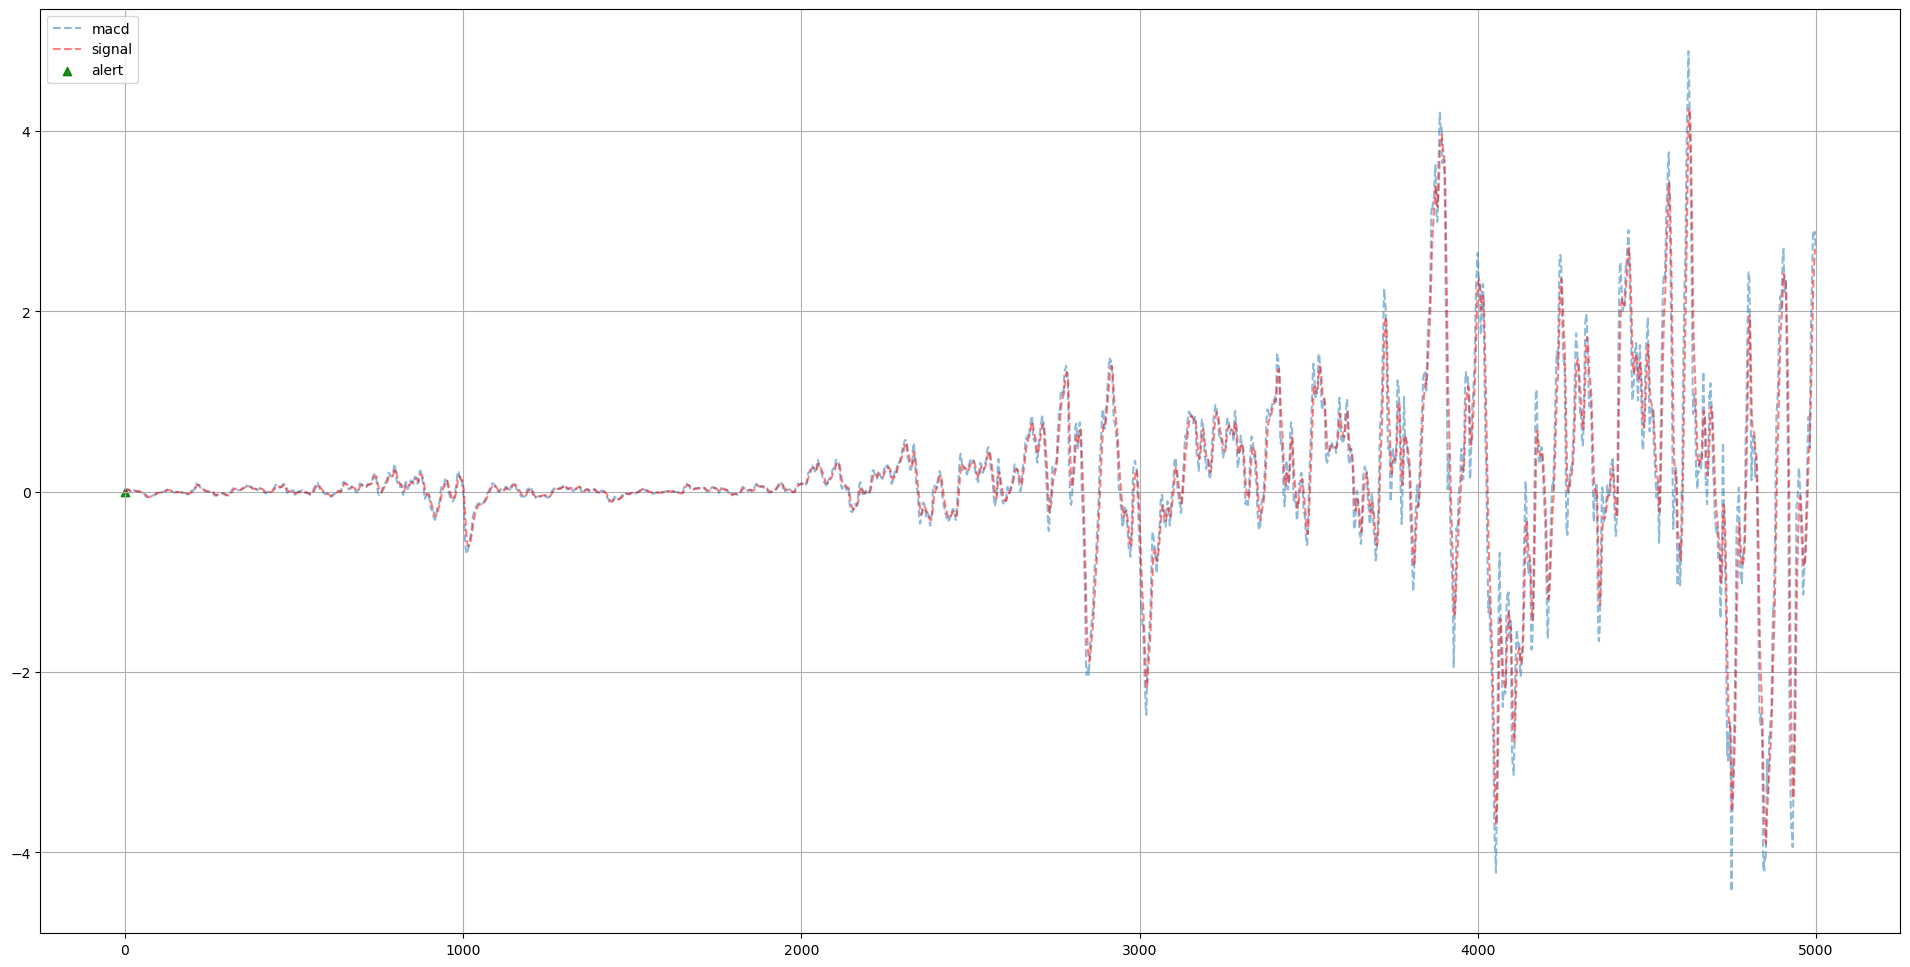

In [69]:
plt.figure(figsize=[24,12])
plt.grid(True)
plt.plot(df['macd'],label='macd',alpha=0.5,linestyle='--')
plt.plot(df['signal'],label='signal',color='red',alpha=0.5,linestyle='--')
plt.scatter(x=strategy.index,y=strategy.trigger,marker='^',color='green',label='alert',alpha=0.9)
plt.legend(loc=2)

In [70]:
fig = px.bar(df, x=df.index, y=df.macd_difference_signal,color="mds_direction")
fig.show()


In [72]:
buy_signals = [] # (note RSI <= 30 considered oversold-->> buy) + + (Price moves close to Bollingor Lower Band considered oversold conditions -->> buy) ++ (MACD crosses above Signal line -->> buy)
sell_signals = [] # (RSI >= 70 considered overbought -->> sale) + (Price moves close to Bollingor Upper Band considered overbought conditions -->> sale) ++ (MACD crosses below Signal line -->> sale)

for i in range(len(df)):
    # BUY trigger
    if df['RSI'][i] <= 30 and df['Close'][i] <= df['bollingor_band_sma'][i] + 1.9 * df['bb_sma_std'][i] and df['macd'][i] > df['signal'][i]:
        buy_signals.append(df['Close'][i])
        sell_signals.append(np.nan)
    # SELL trigger
    elif df['RSI'][i] >= 70 and df['Close'][i] >= df['bollingor_band_sma'][i] - 1.9 * df['bb_sma_std'][i] and df['macd'][i] < df['signal'][i]:
        sell_signals.append(df['Close'][i])
        buy_signals.append(np.nan)
    else:
       buy_signals.append(np.nan)
       sell_signals.append(np.nan)

#Create DataFrame including all above features and randomly generated data
strategy = pd.DataFrame ({'Date':df.Date,'Price':df.Close,'sma':df.SMA,
                          'RSI':df.RSI,'RSI_Indicator':df.rsi_indicator,
                          'bollingor_band_sma':df.bollingor_band_sma,
                          'bb_sma_std':df.bb_sma_std,
                          'bb_upper_band':df.bb_upper_band,'bb_lower_band':df.bb_lower_band,
                          'buy_signals':buy_signals,'sell_signals':sell_signals})
strategy

,Date,Price,sma,RSI,RSI_Indicator,bollingor_band_sma,bb_sma_std,bb_upper_band,bb_lower_band,buy_signals,sell_signals
0,1996-10-09,0.821429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1996-10-10,0.863839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1996-10-11,0.866071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1996-10-14,0.901786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1996-10-15,0.901786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4995,2016-08-15,109.480003,107.439001,85.642765,RSI_overbought_indicator,104.193501,4.140951,112.475402,95.911599,NaN,NaN
4996,2016-08-16,109.379997,107.929001,77.268871,RSI_overbought_indicator,104.669000,4.164304,112.997608,96.340393,NaN,NaN
4997,2016-08-17,109.220001,108.272001,73.106089,RSI_overbought_indicator,105.132000,4.127804,113.387609,96.876391,NaN,NaN
4998,2016-08-18,109.080002,108.593001,73.036911,RSI_overbought_indicator,105.614500,3.987839,113.590179,97.638822,NaN,NaN


In [73]:
# -->> signals (filtered nan values out)
buys = strategy[strategy['buy_signals'].notna()]
sells = strategy[strategy['sell_signals'].notna()]

buys

,Date,Price,sma,RSI,RSI_Indicator,bollingor_band_sma,bb_sma_std,bb_upper_band,bb_lower_band,buy_signals,sell_signals
73,1997-01-23,0.616071,0.620089,18.421050,RSI_oversold_indicator,0.671205,0.078254,0.827714,0.514696,0.616071,NaN
78,1997-01-30,0.598214,0.603125,23.913018,RSI_oversold_indicator,0.624330,0.040426,0.705183,0.543477,0.598214,NaN
79,1997-01-31,0.593750,0.602679,23.913032,RSI_oversold_indicator,0.615179,0.019289,0.653756,0.576601,0.593750,NaN
80,1997-02-03,0.582589,0.600446,23.404232,RSI_oversold_indicator,0.612388,0.019784,0.651956,0.572821,0.582589,NaN
81,1997-02-04,0.549107,0.593750,21.153832,RSI_oversold_indicator,0.608594,0.024055,0.656703,0.560484,0.549107,NaN
82,1997-02-05,0.544643,0.586830,23.913032,RSI_oversold_indicator,0.604353,0.027423,0.659199,0.549507,0.544643,NaN
85,1997-02-10,0.558036,0.575000,26.785720,RSI_oversold_indicator,0.592411,0.024349,0.641108,0.543713,0.558036,NaN
86,1997-02-11,0.560268,0.571652,28.571429,RSI_oversold_indicator,0.588504,0.022801,0.634107,0.542902,0.560268,NaN
87,1997-02-12,0.562500,0.568527,28.571429,RSI_oversold_indicator,0.585826,0.022537,0.630901,0.540751,0.562500,NaN
309,1997-12-30,0.470982,0.481250,22.033899,RSI_oversold_indicator,0.510714,0.036739,0.584193,0.437236,0.470982,NaN


In [ ]:
plt.figure(figsize=[25,12])
plt.grid(True)
plt.plot(strategy['Price'],label='Price')
plt.plot(strategy['bollingor_band_sma'],label='bollingor_band_sma',alpha=0.5,linestyle='--')
#
plt.plot(df['bb_upper_band'],label='bb_upper_band',alpha=0.8,linestyle=':')
plt.plot(df['bb_lower_band'],label='bb_lower_band',alpha=0.8,linestyle=':')
plt.fill_between(x=df.index, y1=df['bb_upper_band'], y2=df['bb_lower_band'], color='blue', alpha=0.05)
#
plt.scatter(x=strategy.index,y=strategy.buy_signals,marker='^',color='green',label='buy_signals',alpha=0.9)
plt.scatter(x=strategy.index,y=strategy.sell_signals,marker='^',color='red',label='sell_signals',alpha=0.9)
plt.title('Stock Price Trading Signals')

plt.legend(loc=2)